### Практическое задание 10


In [13]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pprint import pprint

In [14]:
# 1. Загрузить датасет WINE.
wine = load_wine(as_frame=True)

In [15]:
# 2. Подготовить датасет WINE для кластеризации удалив информацию о классах.
wine, y_wine = wine.data, wine.target
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
# 3. Произвести нормировку preprocessing.StandartScaler().
w = StandardScaler().fit_transform(X=wine)
wine = pd.DataFrame(w, columns=wine.columns)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [17]:
# 4. Произвести кластеризацию с использованием Kmeans++ с числом кластеров равным 3.
km = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=1
)
predicted = km.fit_predict(wine)

In [18]:
from sklearn.metrics import homogeneity_score, completeness_score
# 5. Получить значения метрик качества Homogeneity и Completeness для Kmeans++,
# используя исходную информацию о классах (использовать информацию об исходных классах).


def hc_score(y_true, y_pred):
    print(f"Homogeneity: {homogeneity_score(y_true, y_pred)}")
    print(f"Completeness: {completeness_score(y_true, y_pred)}")


hc_score(y_wine, predicted)

Homogeneity: 0.8954455657307514
Completeness: 0.8897429811300377


In [19]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
# 6. Для заданных алгоритмов кластеризации AgglomerativeClustering и DBSCAN
# подобрать параметры алгоритмов обеспечивающие максимум качества кластеризации
# про метрике Completeness (использовать информацию об исходных классах).


def c_score_wrap(estim, x, y):
    score = completeness_score(estim.fit_predict(x), y)
    return score

In [20]:
opt = GridSearchCV(
    AgglomerativeClustering(),
    param_grid={
        'n_clusters': [3],
        'linkage': ['ward', 'complete', 'average', 'single'],
        'compute_full_tree': ['auto', True, False],
    },
    scoring=c_score_wrap
)
opt.fit(wine, y_wine)
pprint(opt.best_params_)
agg_model = AgglomerativeClustering(**opt.best_params_)
predicted = agg_model.fit_predict(wine)
hc_score(y_wine, predicted)

{'compute_full_tree': 'auto', 'linkage': 'ward', 'n_clusters': 3}
Homogeneity: 0.790429271831654
Completeness: 0.7825408201875712


In [21]:
opt = GridSearchCV(
    DBSCAN(),
    param_grid={
        'min_samples': [1, 2, 3, 4],
        'eps': np.linspace(0.6, 1),
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(1, 30, 10),
        'p': np.arange(2, 5),
    },
    scoring=c_score_wrap
)
opt.fit(wine, y_wine)
pprint(opt.best_params_)
db_model = DBSCAN(**opt.best_params_)
predicted = db_model.fit_predict(wine)
hc_score(y_wine, predicted)

{'algorithm': 'auto', 'eps': 0.6, 'leaf_size': 1, 'min_samples': 1, 'p': 2}
Homogeneity: 1.0000000000000002
Completeness: 0.20958776704971888


In [47]:
# 7. Сравнить результаты кластеризации различными алгоритмами между собой и
# с алгоритмом Kmeans++ (не использовать информацию об исходных классах).
models = [km, agg_model, db_model]
processed = []
for model1 in models:
    for model2 in models:
        if model1 == model2:
            continue
        if (model1, model2) in processed or (model2, model1) in processed:
            continue
        processed.append((model1, model2))
        pred1 = model1.fit_predict(wine)
        pred2 = model2.fit_predict(wine)
        hom_score = homogeneity_score(pred1, pred2)
        com_score = completeness_score(pred1, pred2)

        r_hom_score = homogeneity_score(pred2, pred1)
        r_com_score = completeness_score(pred2, pred1)
        print(
            f"""
        ------ 
        {model1} / {model2}
        Cluster homogenity: {hom_score}
        Cluster completness: {com_score}
        R Cluster homogenity: {r_hom_score}
        R Cluster completness: {r_com_score}
        ------ ------
        """
        )


        ------ 
        KMeans(n_clusters=3, random_state=1) / AgglomerativeClustering(n_clusters=3)
        Cluster homogenity: 0.8105211636197038
        Cluster completness: 0.8075751837297268
        R Cluster homogenity: 0.8075751837297268
        R Cluster completness: 0.8105211636197038
        ------ ------
        

        ------ 
        KMeans(n_clusters=3, random_state=1) / DBSCAN(eps=0.6, leaf_size=1, min_samples=1, p=2)
        Cluster homogenity: 0.9999999999999998
        Cluster completness: 0.21093106730408856
        R Cluster homogenity: 0.21093106730408853
        R Cluster completness: 0.9999999999999996
        ------ ------
        

        ------ 
        AgglomerativeClustering(n_clusters=3) / DBSCAN(eps=0.6, leaf_size=1, min_samples=1, p=2)
        Cluster homogenity: 0.9999999999999996
        Cluster completness: 0.21170052963399735
        R Cluster homogenity: 0.21170052963399735
        R Cluster completness: 0.9999999999999996
        ------ ------
 

## Сравнение результатов кластеризации между собой

---

KMeans(n_clusters=3, random_state=1) / AgglomerativeClustering(n_clusters=3)

Cluster homogenity: 0.8105211636197038

Cluster completness: 0.8075751837297268

R Cluster homogenity: 0.8075751837297268

R Cluster completness: 0.8105211636197038


Комментарий:

Cluster homogenity -> KMeans имеет большее разделение классов в отличие от AgglomerativeClustering

Cluster completness -> При этом AgglomerativeClustering чуть меньше делит классы на части

---

---

KMeans(n_clusters=3, random_state=1) / DBSCAN(eps=0.6, leaf_size=1, min_samples=1, p=2)

Cluster homogenity: 0.9999999999999998

Cluster completness: 0.21093106730408856

R Cluster homogenity: 0.21093106730408853

R Cluster completness: 0.9999999999999996

Комментарий:

Cluster homogenity -> DBSCAN объединил большую часть классов

Cluster completness -> KMeans в сравнении соотетственно эту большую часть разделил

---

---

AgglomerativeClustering(n_clusters=3) / DBSCAN(eps=0.6, leaf_size=1, min_samples=1, p=2)

Cluster homogenity: 0.9999999999999996

Cluster completness: 0.21170052963399735

R Cluster homogenity: 0.21170052963399735

R Cluster completness: 0.9999999999999996

Комментарий:

Аналогичная ситуация что и с KMeans и DBSCAN

---


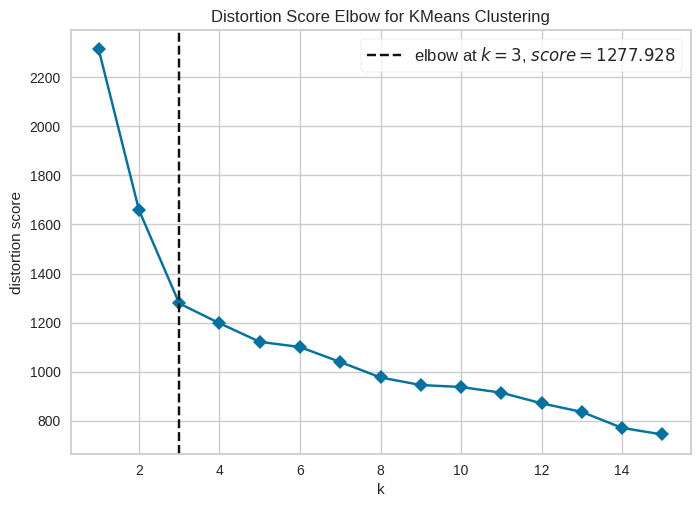

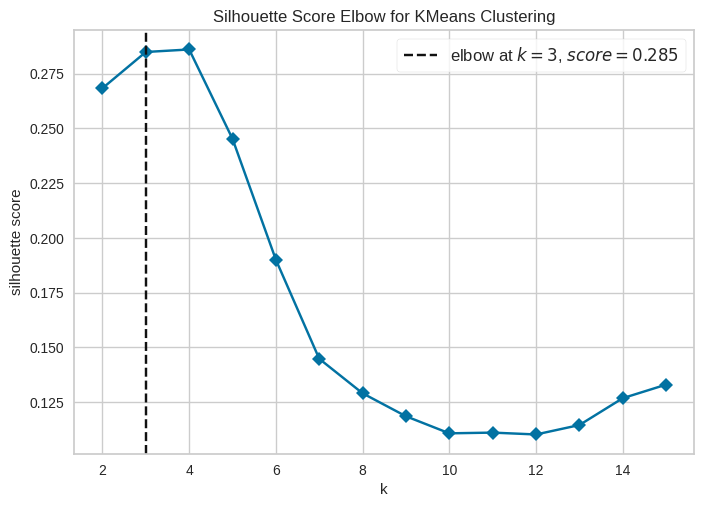

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# 8. Определить оптимальное число кластеров для кластеризации датасета WINE.
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 16), timings=False)
visualizer.fit(wine, y_wine)
visualizer.poof()

visualizer = KElbowVisualizer(
    model, k=(2, 16), metric='silhouette', timings=False)
visualizer.fit(wine, y_wine)
visualizer.poof()

## Оптимальные параметры

Исходя их расчётов по метрикам оценик silhoutte и distortion оптимальным число кластеризации: 3
